# Описание проекта:

Проанализируем данные GoFast популярного сервиса аренды самокатов и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки
абонентская плата отсутствует

стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;
с подпиской Ultra:
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

**Описание данных:**
В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — users_go.csv
user_id	- уникальный идентификатор пользователя
name -имя пользователя
age - возраст
city - город
subscription_type - тип подписки (free, ultra)

Поездки — rides_go.csv:
user_id	- уникальный идентификатор пользователя
distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date - дата совершения поездки

Подписки — subscriptions_go.csv:
subscription_type - тип подписки
minute_price - стоимость одной минуты поездки по данной подписке
start_ride_price - стоимость начала поездки
subscription_fee - стоимость ежемесячного платежа

**Структура проекта:**

- Выгрузка данных
- Предобработка данных
- Исследовательский анализ данных
- Объединение данных
- Подсчет выручки
- Проверка гипотез
- Задачи на распределение
- Общие выводы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats as st
from scipy.stats import binom, norm

In [2]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette("husl")

#### Загрузка данных

In [3]:
users_go = pd.read_csv('/datasets/users_go.csv')
print(users_go.head())
rides_go = pd.read_csv('/datasets/rides_go.csv')
print(rides_go.head())
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
print(subscriptions_go.head())

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra
   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28
  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199


In [4]:

display(users_go.head())
rides_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
print(users_go.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


In [6]:
print(rides_go.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


In [7]:
print(subscriptions_go.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


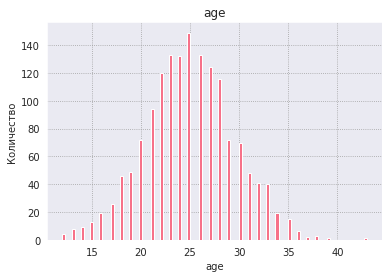

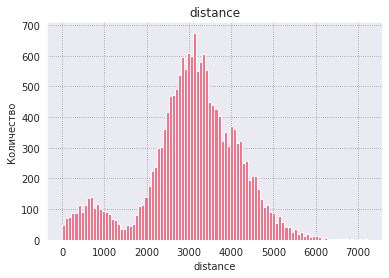

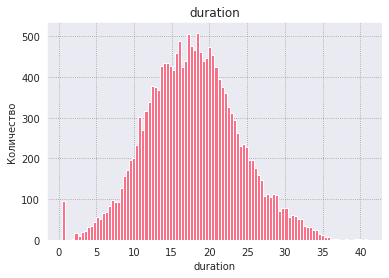

In [8]:
def plot_graphs(df1, df2):
    # Функция для построения графиков числовых показателей

    figures = []
 
    for column in ['age', 'distance', 'duration']:
        plt.figure()
        hist_data = df1[column] if column in df1 else df2[column]
        if hist_data is not None:
            plt.hist(hist_data, bins=100)
            plt.title(column) 
            plt.xlabel(f'{column}')
            plt.ylabel('Количество')
            figures.append([column, hist_data])

    plt.show()
    return 

plot_graphs(rides_go, users_go)

**Вывод:** в данных нет пропусков. Потребуется скорретировать тип данных в некоторых столбцах датафреймов, а также проверить данные на дубликаты. 

#### Предобработка данных

**2.1 Приведение к формату даты:**

In [9]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')
rides_go['month'] = rides_go['date'].dt.month

**2.2 Удаление дубликатов:**

In [10]:
print('Количество явных дубликатов среди пользователей = ', users_go.duplicated().sum())
print('Количество явных дубликатов в датафрейме поездок = ', rides_go.duplicated().sum())

Количество явных дубликатов среди пользователей =  31
Количество явных дубликатов в датафрейме поездок =  0


In [11]:
users_go = users_go.drop_duplicates(keep='first')       

In [12]:
print('Количество явных дубликатов среди пользователей = ', users_go.duplicated().sum())

Количество явных дубликатов среди пользователей =  0


Явные дубликаты удалены.

Проверка пользоватлей на неявные дубликаты по id (датафрейм users_go):

In [13]:
users_go['user_id'].value_counts(ascending=False)

1       1
1020    1
1029    1
1028    1
1027    1
       ..
510     1
509     1
508     1
507     1
1534    1
Name: user_id, Length: 1534, dtype: int64

Неявные дубликаты не обнаружены.

По другим параметрам датафремов проверка не требуется, они могут дублироваться.

**Вывод:** провели предобработку данных, удалили явные дубликаты и изменили тип данных в параметре даты. 

In [14]:
# Комментарий ревьюера
temp = rides_go.copy() # Создаем копию, что бы не изменять текущий датасет
display(temp['distance'].head(3))
# Округление расстояния
temp['distance'] = temp['distance'].round(2)
temp['distance'].head(3)

0    4409.919140
1    2617.592153
2     754.159807
Name: distance, dtype: float64

0    4409.92
1    2617.59
2     754.16
Name: distance, dtype: float64

#### Исследовательский анализ данных

#####  Частота встречаемости городов

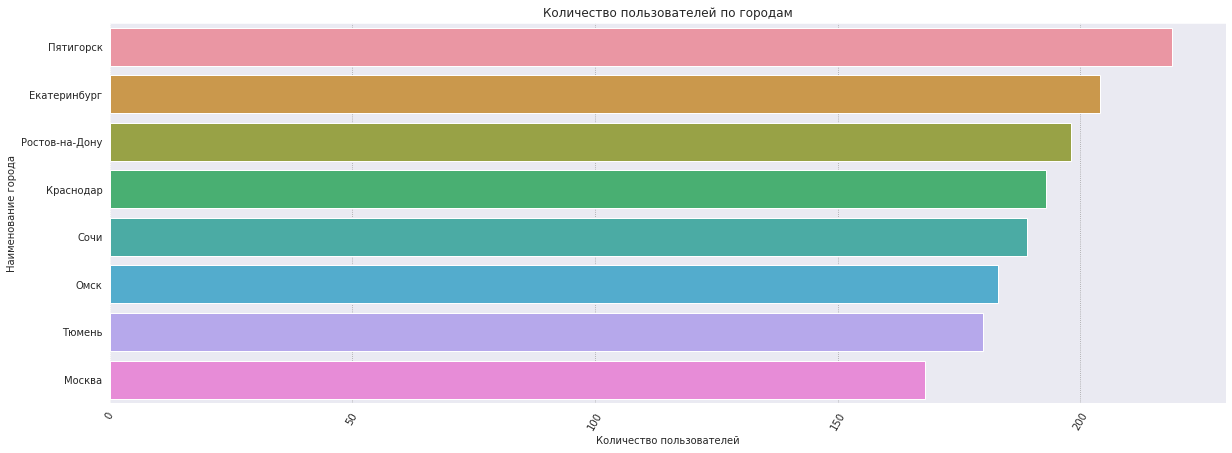

Количество пользователей по городам: 


,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


In [15]:
city = users_go.groupby('city')['user_id'].count().reset_index().sort_values('user_id', ascending=False)

plt.figure(figsize=(20, 7))
sns.barplot(data=city, x='user_id', y='city') 
plt.title('Количество пользователей по городам')
plt.ylabel('Наименование города')
plt.xlabel('Количество пользователей')
plt.xticks(rotation = 60)
plt.show()

print('Количество пользователей по городам: ') 
users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)

**Промежуточный вывод:**  чаще всего встречался Пятигорск - 219 раз, реже всего Москва - 168 раз. Москва на последнем месте возможно из-за того, что ввиду больших расстояний в городе, чаще бывает более удобно добраться на другом транспорте, напрмер, метро. Также стоит отметить, что большинство городов находятся на юге страны, где сезон проката может быть дольше. 

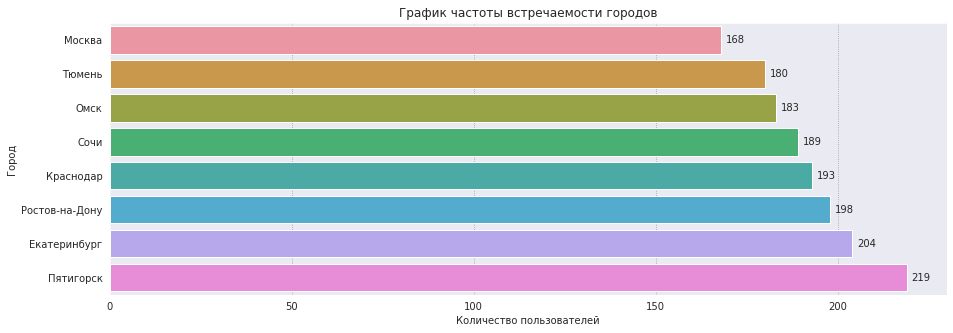

In [16]:
# Комментарий ревьюера
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Создаем копию датасета, чтобы не работать с исходным
tmp = users_go.copy()

# Построение горизонтальной диаграммы с использованием seaborn
plt.figure(figsize=(15, 5))
ax = sns.countplot(y='city', data=tmp, order=tmp['city'].value_counts(ascending=True).index)

# Добавление значений рядом со столбцами
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Добавление меток осей и заголовка
plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.title('График частоты встречаемости городов')

# Отображение графика
plt.show()

##### Соотношение пользователей с подпиской и без подписки

Количество пользователей по типу подписки:
  тип подписки  количество id пользователей
0         free                          835
1        ultra                          699


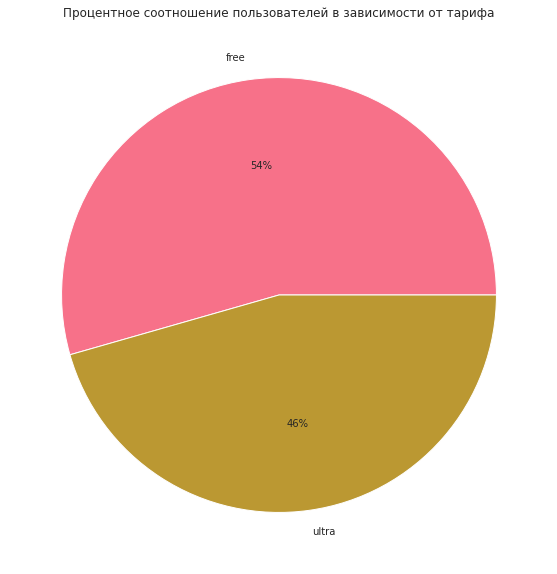

In [17]:
user_count = users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count').reset_index()
print("Количество пользователей по типу подписки:")
user_count.columns = ['тип подписки', 'количество id пользователей']
print(user_count)

users_go['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = user_count['тип подписки'].value_counts(), 
    autopct = '%1.0f%%', 
    figsize=(10,10),
    title = 'Процентное соотношение пользователей в зависимости от тарифа');

plt.ylabel('')
plt.show()

**Промежуточный вывод:** платных подписчиков меньше - 46%, чем бесплатных - 54%

##### Возраст пользователей

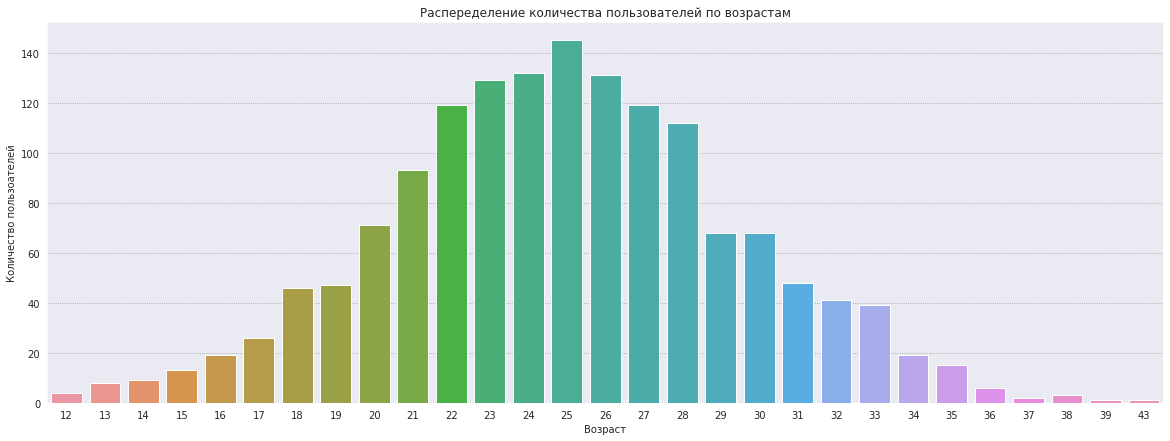

In [18]:
age = users_go.pivot_table(index='age', values='user_id', aggfunc='count').reset_index()
age.columns = ['возраст', 'количество пользователей']

plt.figure(figsize=(20, 7))
sns.barplot(data=age, x='возраст', y='количество пользователей') 
plt.title('Распеределение количества пользователей по возрастам')
plt.ylabel('Количество пользоателей')
plt.xlabel('Возраст')
plt.show()


In [19]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

**Промежуточный вывод:** В основном прокатом самокатов пользуются клиенты от 21 до 28 лет. Среднее значение возраста пользователей практически совпадает с медианой - почти 25 лет. 

##### Расстояние, которое пользователь преодолел за одну поездку

In [20]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

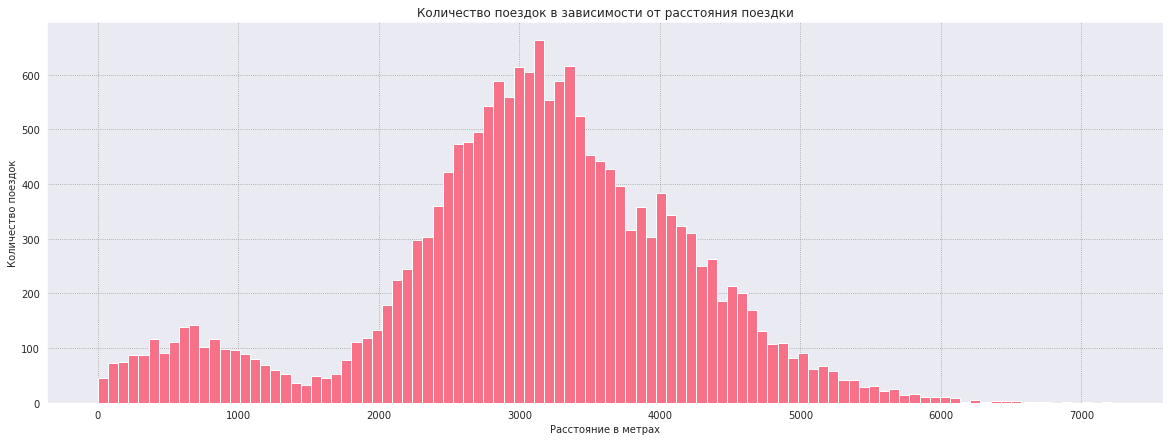

In [21]:
plt.figure(figsize=(20, 7))
plt.hist(rides_go['distance'], bins=100, range=(1,7220))
plt.title('Количество поездок в зависимости от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

**Промежуточный вывод:** растояние одной поездки в среднем 3-3.2км. Однако, можем наблюдать небольшой пик на растоянии 600-700м. 

##### Продолжительность поездок

In [22]:
rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

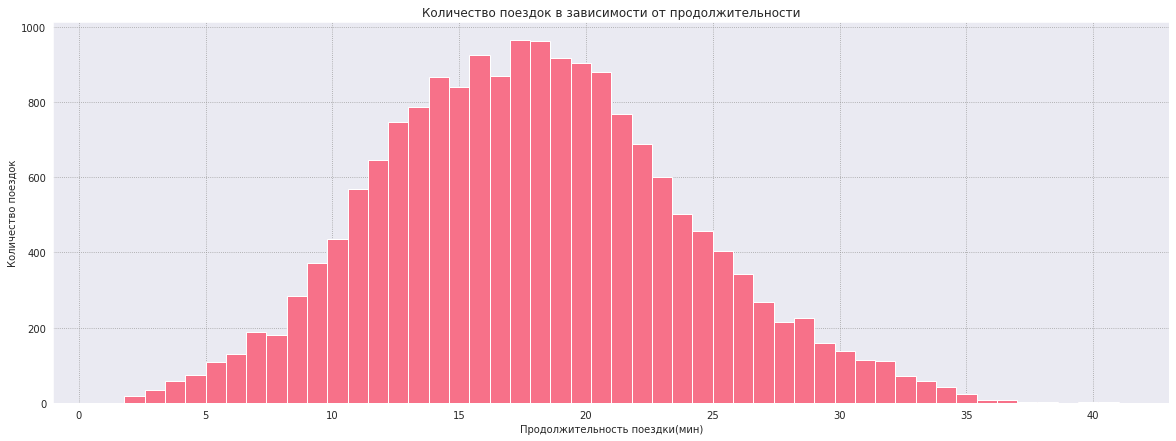

In [23]:
plt.figure(figsize=(20, 7))
plt.hist(rides_go['duration'], bins=50, range=(1,41))
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Продолжительность поездки(мин)')
plt.ylabel('Количество поездок')
plt.show()

**Промежуточный вывод:** в среднем поездка длится 17-19 минут. 

##### Вывод

- Чаще всего встречался Пятигорск - 219 раз, реже всего Москва - 168 раз. Москва на последнем месте возможно из-за того, что ввиду больших расстояний в городе, чаще бывает более удобно добраться на другом транспорте, напрмер, метро.
- Большинство городов находятся на юге страны, где сезон проката может быть дольше.
- Платных подписчиков меньше - 46%, чем бесплатных - 54%.
- В основном прокатом самокатов пользуются клиенты от 21 до 28 лет. Среднее значение возраста пользователей практически совпадает с медианой - почти 25 лет. 
- Растояние одной поездки в среднем 3-3.2км. Однако, можем наблюдать небольшой пик на растоянии 600-700м.
- В среднем поездка длится 17-19 минут. 

#### Объединение данных

##### Объединение данные о пользователях, поездках и подписках

In [24]:
df = pd.merge(users_go, subscriptions_go, on='subscription_type')
df = pd.merge(rides_go, df, on='user_id')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [26]:
df.head(25)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


**Промежуточный вывод:** все датафреймы объединены. Пропуски не обнаружены.

##### Создание отдельных датафреймов для подписчиков и бесплатных пользователей

In [28]:
free = df.query('subscription_type == "free"')
free

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [29]:
ultra = df.query('subscription_type == "ultra"')
ultra

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,3973.046497,24.671163,2021-08-29,8,Оксана,22,Москва,ultra,6,0,199
6496,699,3288.702563,15.892886,2021-09-12,9,Оксана,22,Москва,ultra,6,0,199
6497,699,3076.159348,14.389525,2021-09-26,9,Оксана,22,Москва,ultra,6,0,199
6498,699,4707.845501,15.839579,2021-10-17,10,Оксана,22,Москва,ultra,6,0,199


**Промежуточный вывод:** датафреймы расзделены по типу подписки.

##### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

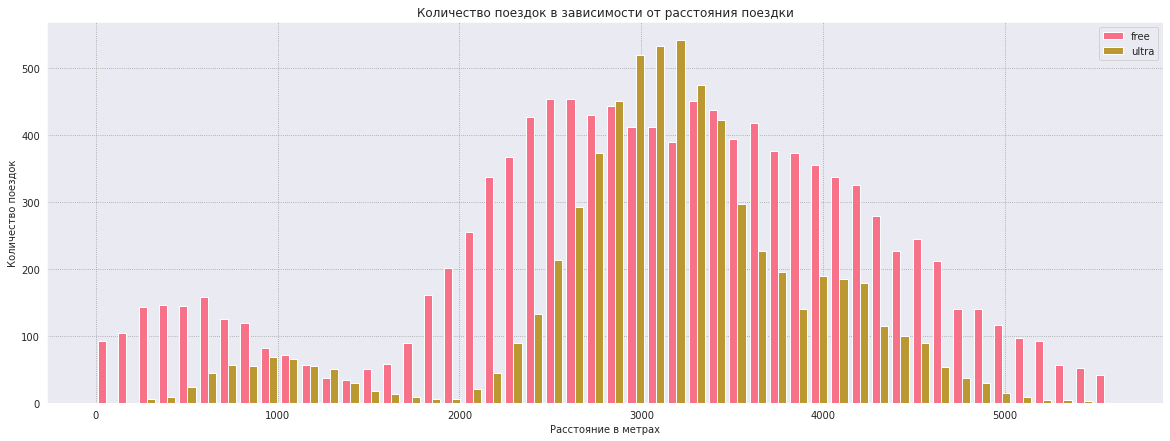

In [30]:
plt.figure(figsize=(20, 7))
plt.hist([free['distance'], ultra['distance']], bins=50, range=(1,5600), label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

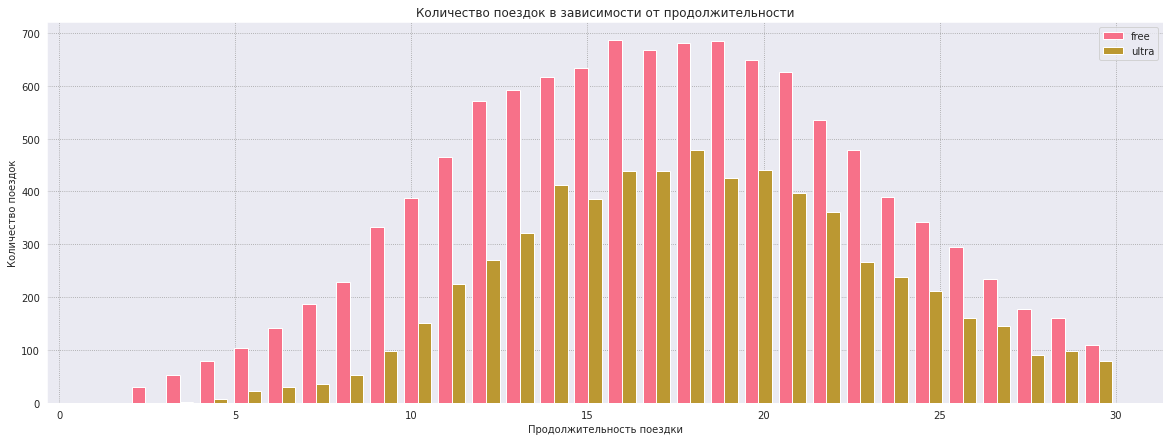

In [31]:
plt.figure(figsize=(20, 7))
plt.hist([free['duration'], ultra['duration']], bins=30, range=(1,30), label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

Также проверим среднюю скорость на наличие выбросов.

In [32]:
print((free['distance'] / free['duration']).describe())
print((ultra['distance'] / ultra['duration']).describe())

count    11568.000000
mean       259.965288
std        917.427642
min          0.085552
25%        133.620559
50%        172.242392
75%        219.252295
max      14422.015489
dtype: float64
count    6500.000000
mean      175.988183
std        55.677720
min        24.762973
25%       137.812273
50%       168.591790
75%       208.781551
max       363.093690
dtype: float64


**Промежуточный вывод:** 

Графики показывают:

- Подписчики в среднем используют самокаты на расстояния, совпадающие с общими показателями всех пользователй 3-3.2км.
- У подписчиков ярко выраженный пик на 3-3.2км, из чего можем предположить, что их маршрут более стандартизирован, из-за чего они и приобретают подписку для систематических поездок. 
- Пользователи без подписки не имеют столь ярковыраженный пик. 
- Второй пик, наблюдаемый в п.3 для подписчиков сместился ориентировочно на 1000м. В то время, как для остальных пользоватлей, наоборот уменишься - 500-600м. 
- Среднее время поездки для обоих категорий также 17-19 минут, что совпадает с выводами п.3.
- Исходя из рассчитанной средне скорости видим явный аутлаер: 14422 метров минуту. Самокаты обычно ограничиаются на 20км/ч = 1000м/мин. Возможно произошла техническая ошибка при выгрузке данных о поездке. 


#####  Вывод

- Объединили датафреймы.
- Создали отдельные датафреймы для клиентов с подпиской и без.
- Подписчики в среднем используют самокаты на расстояния, совпадающие с общими показателями всех пользователй 3-3.2км.
- У подписчиков ярко выраженный пик на 3-3.2км, из чего можем предположить, что их маршрут более стандартизирован, из-за чего они и приобретают подписку для систематических поездок. 
- Пользователи без подписки не имеют столь ярковыраженный пик. 
- Второй пик, наблюдаемый в п.3 для подписчиков сместился ориентировочно на 1000м. В то время, как для остальных пользоватлей, наоборот уменишься - 500-600м. 
- Среднее время поездки для обоих категорий также 17-19 минут, что совпадает с выводами п.3.
- Исходя из рассчитанной средне скорости видим явный аутлаер: 14422 метров минуту. Самокаты обычно ограничиаются на 20км/ч = 1000м/мин. Возможно произошла техническая ошибка при выгрузке данных о поездке.


####  Подсчёт выручки

##### Датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4.

In [33]:
df['duration'] = np.ceil(df['duration']) 
users_per_month = df.pivot_table(
    index=('user_id', 'month'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ), 
    aggfunc={
        'distance':{
            'count', 
            'sum'}, 
         'duration':'sum',
         'minute_price': 'mean',
         'start_ride_price':'mean',
         'subscription_fee':'mean'
    }
)

columns_names = [
    'Количество поездок', 'Общее расстояние', 
    'Совокупная длительность(мин)', 
    'Цена за минуту',
    'Стартовая цена поездки', 
    'Абонентская плата'
]

users_per_month.columns = columns_names

 

users_per_month.head(10)

Количество поездок  Общее расстояние  \
user_id month                                         
1       1                       2       7027.511294   
        4                       1        754.159807   
        8                       2       6723.470560   
        10                      2       5809.911100   
        11                      3       7003.499363   
        12                      2       6751.629942   
2       3                       3      10187.723006   
        4                       2       6164.381824   
        6                       1       3255.338202   
        7                       2       6780.722964   

               Совокупная длительность(мин)  Цена за минуту  \
user_id month                                                 
1       1                              42.0               6   
        4                               7.0               6   
        8                              46.0               6   
        10                             32.0               6   
        11                             56.0               6   
        12                             28.0               6   
2       3                              63.0               6   
        4                              40.0               6   
        6                              14.0               6   
        7                              48.0               6   

               Стартовая цена поездки  Абонентская плата  
user_id month                                             
1       1                           0                199  
        4                           0                199  
        8                           0                199  
        10                          0                199  
        11                          0                199  
        12                          0                199  
2       3                           0                199  
        4                           0                199  
        6                           0                199  
        7                           0                199

In [34]:
users_per_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Количество поездок            11331 non-null  int64  
 1   Общее расстояние              11331 non-null  float64
 2   Совокупная длительность(мин)  11331 non-null  float64
 3   Цена за минуту                11331 non-null  int64  
 4   Стартовая цена поездки        11331 non-null  int64  
 5   Абонентская плата             11331 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 576.5 KB


**Промежуточный вывод:** создали датафрейм, округлили совокупную длительность в минутах, пропуски не обнаружены.

##### Помесячная вырчка по каждому пользователю.

In [35]:
users_per_month['Месячный заработок'] = (users_per_month['Стартовая цена поездки']*users_per_month['Количество поездок']+
                                        users_per_month['Цена за минуту']*users_per_month['Совокупная длительность(мин)']+
                                        users_per_month['Абонентская плата'])

In [36]:
users_per_month

Количество поездок  Общее расстояние  \
user_id month                                         
1       1                       2       7027.511294   
        4                       1        754.159807   
        8                       2       6723.470560   
        10                      2       5809.911100   
        11                      3       7003.499363   
...                           ...               ...   
1534    6                       2       3409.468534   
        8                       2       7622.453034   
        9                       1       4928.173852   
        11                      4      13350.015305   
        12                      1       2371.711192   

               Совокупная длительность(мин)  Цена за минуту  \
user_id month                                                 
1       1                              42.0               6   
        4                               7.0               6   
        8                              46.0               6   
        10                             32.0               6   
        11                             56.0               6   
...                                     ...             ...   
1534    6                              26.0               8   
        8                              48.0               8   
        9                              23.0               8   
        11                             78.0               8   
        12                             16.0               8   

               Стартовая цена поездки  Абонентская плата  Месячный заработок  
user_id month                                                                 
1       1                           0                199               451.0  
        4                           0                199               241.0  
        8                           0                199               475.0  
        10                          0                199               391.0  
        11                          0                199               535.0  
...                               ...                ...                 ...  
1534    6                          50                  0               308.0  
        8                          50                  0               484.0  
        9                          50                  0               234.0  
        11                         50                  0               824.0  
        12                         50                  0               178.0  

[11331 rows x 7 columns]

In [37]:
print(users_per_month['Месячный заработок'].describe())

count    11331.000000
mean       342.303504
std        153.875346
min         58.000000
25%        234.000000
50%        319.000000
75%        415.000000
max       1444.000000
Name: Месячный заработок, dtype: float64


In [38]:
print('Выручка за год:', users_per_month['Месячный заработок'].sum(), 'руб')

Выручка за год: 3878641.0 руб


In [39]:
# Комментарий ревьюера
# Контроль суммы выручки
tmp, col_rev = users_per_month.copy(), 'Месячный заработок'
print("Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице:", tmp[col_rev].sum())

Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице: 3878641.0


**Промежуточный вывод:**

- В среднем каждый пользователь самоката приносит чуть больше 342 рублей в месяц.
- Общая выручка за год составила 3 878 641 руб.

##### Вывод

- Создали датафрейм, округлили совокупную длительность поездок в минутах.
- В среднем каждый пользователь самоката приносит чуть больше 342 рублей в месяц.
- Общая выручка за год составила 3 878 641 руб.

#### Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки?

Гипотезы:

- Н0: средняя длительность поездок пользователей с подпиской и без равна.
- Н1: средняя длительность поездок пользователей с подпиской больше, чем у пользователей без подписки. 

In [40]:
results = st.ttest_ind(ultra['duration'], free['duration'], equal_var=False, alternative='greater')
print('p-значение:', results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


**Промежуточный вывод:** нулевая гипотеза отвергнута. Можно утверждать, что пользователи с подпиской тратят больше времени на поездки, при пороге значимости p-value=5%.

##### Оптимальное расстояние с точки зрения износа самоката.

Гипотезы:

- Н0: Среднее расстояние поездок подписчиков равно оптимальному расстоянию с точки зрения износа самоката - 3130 м. 
- Н1: Среднее расстояние поездок подписчиков больше оптимального расстояния с точки зрения износа самоката - 3130 м.

In [41]:
distance = 3130
alpha = 0.05

results = st.ttest_1samp(ultra['distance'], distance, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


**Промежуточный вывод:** нулевая гипотеза не отвергнута. Можем утверждать, что среднее расстояние поездок подписчиков равно оптимальному расстоянию с точки зрения износа самоката - 3130 м, при пороге значимости p-value=5%. 

##### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Гипотезы: 

- Н0: Среднняя выручка в месяц от пользователей с подпиской равна выручке от пользователей без подписки.
- Н1: Среднняя выручка в месяц от пользователей с подпиской больше выручки от пользователей без подписки.

In [42]:
results = st.ttest_ind(
    users_per_month.loc[users_per_month['Абонентская плата'] > 0, 'Месячный заработок'], 
    users_per_month.loc[users_per_month['Абонентская плата'] == 0, 'Месячный заработок'], 
    equal_var=False, 
    alternative='greater')

print('p-значение:', results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу


**Промежуточный вывод:** нулевая гипотеза отвергнута. Можно утверждать, что средняя выручка в месяц от пользователей с подпиской выше, чем от пользоватлей без, при пороге значимости p-value=5%.

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В данном случае будут сравнивать две зависимые выборки, поэтому подойдет метод: scipy.stats.ttest_rel()

##### Вывод

- Пользователи с подпиской тратят больше времени на поездки, при пороге значимости p-value=5%.
- Среднее расстояние поездок подписчиков равно оптимальному расстоянию с точки зрения износа самоката - 3130 м, при пороге значимости p-value=5%. 
- Средняя выручка в месяц от пользователей с подпиской выше, чем от пользоватлей без, при пороге значимости p-value=5%.
- Для сравнения двух зависимых выборок используем метод: scipy.stats.ttest_rel()

####  Распределения

#####  Нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

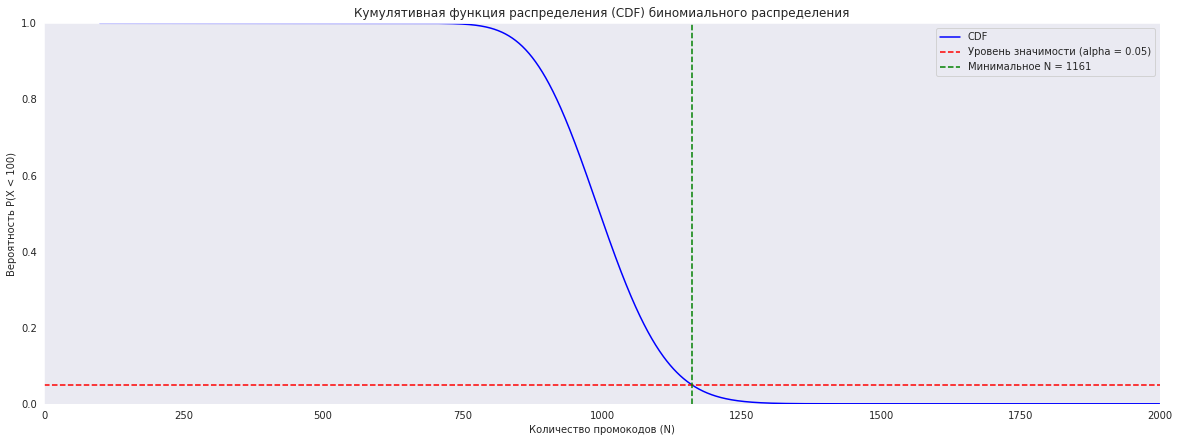

In [43]:
p = 0.1  
alpha = 0.05  
target_successes = 100


N_values = []
cdf_values = []  
X = None  

for N in range(100, 2000):
    cdf_value = binom.cdf(target_successes - 1, N, p)
    N_values.append(N)
    cdf_values.append(cdf_value)  
    if cdf_value < alpha and X is None:  
        X = N


plt.figure(figsize=(20, 7))
plt.plot(N_values, cdf_values, label='CDF', color='blue')
plt.axhline(y=alpha, color='red', linestyle='--', label='Уровень значимости (alpha = 0.05)')

if X is not None:
    plt.axvline(x=X, color='green', linestyle='--', label=f'Минимальное N = {X}')

plt.title('Кумулятивная функция распределения (CDF) биномиального распределения')
plt.xlabel('Количество промокодов (N)')
plt.ylabel('Вероятность P(X < 100)')
plt.legend()
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 2000)
plt.show()

**Промежуточный вывод:** необходимо отправить как минимум 1161 промокод, чтобы выполнить план (100 человек) с возможным процентом сорвать план 5%.

##### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность того, что уведомление откроют не более 399500 пользователей: 0.1537


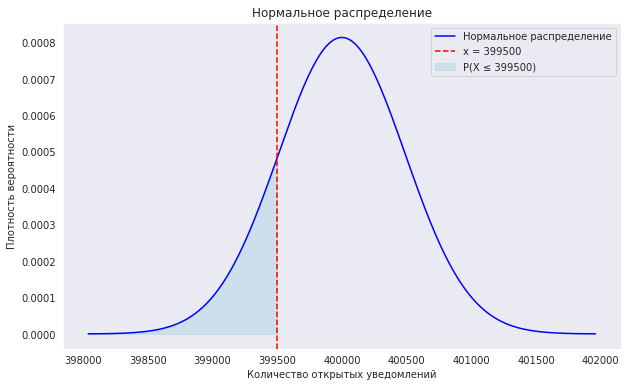

In [44]:

n = 1_000_000  
p = 0.4 

mu = n * p  
sigma = np.sqrt(n * p * (1 - p))  

x_value = 399_500

probability = norm.cdf(x_value, mu, sigma)

print(f"Вероятность того, что уведомление откроют не более {x_value} пользователей: {probability:.4f}")

x = np.arange(mu - 4*sigma, mu + 4*sigma, 1)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Нормальное распределение', color='blue')
plt.fill_between(x, y, where=(x <= x_value), color='lightblue', alpha=0.5, label=f'P(X ≤ {x_value})')
plt.axvline(x=x_value, color='red', linestyle='--', label=f'x = {x_value}')
plt.title('Нормальное распределение')
plt.xlabel('Количество открытых уведомлений')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

**Промежуточный вывод:** вероятность того, что уведомление откроют не более 399500 пользователей: 15.37%

##### Вывод:

- Необходимо отправить как минимум 1161 промокод, чтобы выполнить план (100 человек) с возможным процентом провала 5%.
- Вероятность того, что уведомление откроют не более 399500 пользователей: 15.37%

#### Общий вывод

**Загрузга данных:**

Были загружены данные трех датасетов: users_go.csv, rides_go.csv и subscriptions_go.csv.

**Предобработка данных:**

Провели предобработку данных, удалили явные дубликаты и изменили тип данных в параметре даты. 

**Промежуточные выводы:**

- Чаще всего встречался Пятигорск - 219 раз, реже всего Москва - 168 раз. Москва на последнем месте возможно из-за того, что ввиду больших расстояний в городе, чаще бывает более удобно добраться на другом транспорте, напрмер, метро.
- Большинство городов находятся на юге страны, где сезон проката может быть дольше.
- Платных подписчиков меньше - 46%, чем бесплатных - 54%.
- В основном прокатом самокатов пользуются клиенты от 21 до 28 лет. Среднее значение возраста пользователей практически совпадает с медианой - почти 25 лет. 
- Растояние одной поездки в среднем 3-3.2км. Однако, можем наблюдать небольшой пик на растоянии 600-700м.
- В среднем поездка длится 17-19 минут. 

- Подписчики в среднем используют самокаты на расстояния, совпадающие с общими показателями всех пользователй 3-3.2км.
- У подписчиков ярко выраженный пик на 3-3.2км, из чего можем предположить, что их маршрут более стандартизирован, из-за чего они и приобретают подписку для систематических поездок. 
- Пользователи без подписки не имеют столь ярковыраженный пик. 
- Второй пик, наблюдаемый в п.3 для подписчиков сместился ориентировочно на 1000м. В то время, как для остальных пользоватлей, наоборот уменишься - 500-600м. 
- Среднее время поездки для обоих категорий также 17-19 минут, что совпадает с выводами п.3.
- Исходя из рассчитанной средне скорости видим явный аутлаер: 14422 метров минуту. Самокаты обычно ограничиаются на 20км/ч = 1000м/мин. Возможно произошла техническая ошибка при выгрузке данных о поездке.

- Создали датафрейм, округлили совокупную длительность поездок в минутах.
- В среднем каждый пользователь самоката приносит чуть больше 342 рублей в месяц.
- Общая выручка за год составила 3 878 641 руб.

- Пользователи с подпиской тратят больше времени на поездки, при пороге значимости p-value=5%.
- Среднее расстояние поездок подписчиков равно оптимальному расстоянию с точки зрения износа самоката - 3130 м, при пороге значимости p-value=5%. 
- Средняя выручка в месяц от пользователей с подпиской выше, чем от пользоватлей без, при пороге значимости p-value=5%.
- Для сравнения двух зависимых выборок используем метод: scipy.stats.ttest_rel()

**Рекомендации для дальнейших исследований:** 

- Сфокусироваться на ислледовании сезонности в разных городах.
- В данных были найдены проблемы при расчете средней скорости, которая слишком велика для самокатов, рекомендуется проверить данные.

**Ответы на задачи маркетологов:** 

- Необходимо отправить как минимум 1161 промокод, чтобы выполнить план (100 человек) с возможным процентом провала 5%.
- Вероятность того, что уведомление откроют не более 399500 пользователей: 15.37%


**Общий вывод:**

Анализ использования самокатов показал, что Пятигорск является наиболее популярным городом для проката, в то время как Москва занимает последнее место, возможно, из-за удобства альтернативного транспорта, такого как метро. Большинство пользователей находятся на юге страны, где сезон проката может быть длиннее.

Структура пользователей показывает, что платных подписчиков меньше (46%) по сравнению с бесплатными (54%). Основная возрастная группа пользователей — молодые люди от 21 до 28 лет, со средним возрастом около 25 лет. Средняя длина поездки составляет 3-3.2 км, с продолжительностью 17-19 минут. Подписчики имеют более стандартизированные маршруты, что подтверждается их ярко выраженным пиком в расстоянии поездок.

Обнаружены аномалии в данных о скорости, что может указывать на технические ошибки. В среднем каждый пользователь приносит около 342 рублей в месяц, а общая выручка за год составила 3 878 641 рубль. Пользователи с подпиской проводят больше времени в поездках и генерируют более высокую выручку, что статистически значимо.

В целом, акцент на развитие платной подписки и улучшение сервиса может повысить прибыль и эффективность проката самокатов.
